## Obrada slike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

from PIL import Image, ImageDraw, ImageFont

In [6]:
df_train = pd.read_csv('kuzushiji/traincsv/train.csv')

x0 = 1933
y0 = 1146

In [7]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.72*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

In [8]:
def image_processing(image_fn, labels):
    imsource = cv2.imread(image_fn)
    imsource = cv2.cvtColor(imsource, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(imsource, (y0, x0))
    x1, y1, z1 = imsource.shape
    xx = x0/x1
    yy = y0/y1
    
    new_labels = []
    labels = np.array(labels.split(' ')).reshape(-1, 5)
    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x)*yy, int(y)*xx, int(w)*xx, int(h)*yy
        new_labels.append([codepoint, x, y, w, h])

    img_gray = my_rgb2gray(resized_image)
#     ret, image_bin = cv2.threshold(img_gray, 165, 255, cv2.THRESH_BINARY)
    ret, image_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

    return image_bin, new_labels

In [9]:
images_processed = []
for val in df_train.values:
    image_id = val[0]
    labels = val[1]
    image_fn = r'kuzushiji/train_images/{}.jpg'.format(image_id)
    img, new_labels = image_processing(image_fn, labels)
    filename = r'kuzushiji_resized/train_images/{}.jpg'.format(image_id)
    cv2.imwrite(filename, img)
    images_processed.append([image_id, img, new_labels])

In [10]:
df = pd.DataFrame(data=images_processed, columns=['image_id', 'image', 'labels'])

In [11]:
df

,image_id,image,labels
0,100241706_00004_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[U+306F, 586.824459234609, 1728.922302529685,..."
1,100241706_00005_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[U+306F, 520.7784280936455, 1006.916365513681..."
2,100241706_00005_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[U+306F, 271.3211920529801, 686.5792462570986..."
3,100241706_00006_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[U+3082, 705.9398814563929, 1496.756819351518..."
4,100241706_00007_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[U+309D, 575.3954849498328, 1473.737590486039..."
...,...,...,...
3600,umgy012-038,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[U+30FD, 582.3062645011602, 526.0948453608247..."
3601,umgy012-039,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[U+309D, 271.0694058856191, 301.6591375770020..."
3602,umgy012-040,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[U+30DE, 441.0699260943718, 216.9152367879203..."
3603,umgy012-041,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[U+309D, 982.640650406504, 526.942895989123, ..."


## Čitanje CSV u dataframe

In [2]:
import pandas as pd

df = pd.read_csv('kuzushiji_resized/train1.csv')

In [3]:
df

,image_id,features,labels
0,100241706_00004_2,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[['U+306F', 586.824459234609, 1728.92230252968..."
1,100241706_00005_1,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[['U+306F', 520.7784280936455, 1006.9163655136..."
2,100241706_00005_2,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[['U+306F', 271.3211920529801, 686.57924625709..."
3,100241706_00006_1,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[['U+3082', 705.9398814563929, 1496.7568193515..."
4,100241706_00007_2,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,"[['U+309D', 575.3954849498328, 1473.7375904860..."
...,...,...,...
3600,umgy012-038,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[['U+30FD', 582.3062645011602, 526.09484536082..."
3601,umgy012-039,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[['U+309D', 271.0694058856191, 301.65913757700..."
3602,umgy012-040,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[['U+30DE', 441.0699260943718, 216.91523678792..."
3603,umgy012-041,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[['U+309D', 982.640650406504, 526.942895989123..."


In [7]:
from collections import namedtuple

In [8]:
def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

In [9]:
examples = df
grouped = split(examples, 'image_id')

In [10]:
grouped

[data(filename='100241706_00004_2', object=            image_id                                           features  \
 0  100241706_00004_2  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...   
 
                                               labels  
 0  [['U+306F', 586.824459234609, 1728.92230252968...  ),
 data(filename='100241706_00005_1', object=            image_id                                           features  \
 1  100241706_00005_1  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...   
 
                                               labels  
 1  [['U+306F', 520.7784280936455, 1006.9163655136...  ),
 data(filename='100241706_00005_2', object=            image_id                                           features  \
 2  100241706_00005_2  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...   
 
                                               labels  
 2  [['U+306F', 271.3211920529801, 686.57924625709...  ),
 data(filename='100241706_00006_1', object=            image_id       

In [13]:
d = {'col1': [1, 1, 2], 'col2': [3, 4, 5]}
df1 = pd.DataFrame(data=d)
df1

,col1,col2
0,1,3
1,1,4
2,2,5


In [15]:
g = split(df1, 'col1')

In [16]:
g

[data(filename=1, object=   col1  col2
 0     1     3
 1     1     4),
 data(filename=2, object=   col1  col2
 2     2     5)]

In [17]:
for group in g:
    print(group)

data(filename=1, object=   col1  col2
0     1     3
1     1     4)
data(filename=2, object=   col1  col2
2     2     5)


## Prikaz slike sa labelama

In [12]:
fontsize = 50
font = ImageFont.truetype('./kuzushiji/NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

In [13]:
unicode_map = {codepoint: char for codepoint, char in pd.read_csv('kuzushiji/unicode_translation.csv').values}

In [14]:
# This function takes in a filename of an image, and the labels in the string format given in train.csv, 
# and returns an image containing the bounding boxes and characters annotated
def visualize_training_data(image_fn, labels):
    # Convert annotation string to array
    #labels = np.array(labels.split(' ')).reshape(-1, 5) #labels = [oznaka, dimenzije]
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x), int(y), int(w), int(h)
        char = unicode_map[codepoint] # Convert codepoint to actual unicode character

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(0, 0, 255, 255), font=font)
        Croped_image = imsource.crop((x, y, x+w, y+h))
        plt.figure()
        print(str(unicode_map[codepoint]))
        plt.imshow(Croped_image)
        plt.show()

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

は


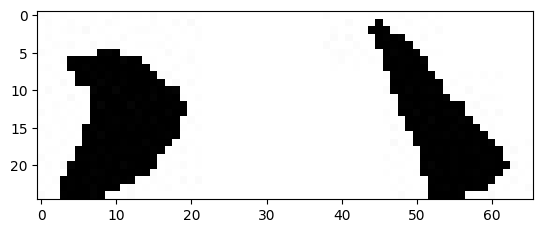

が


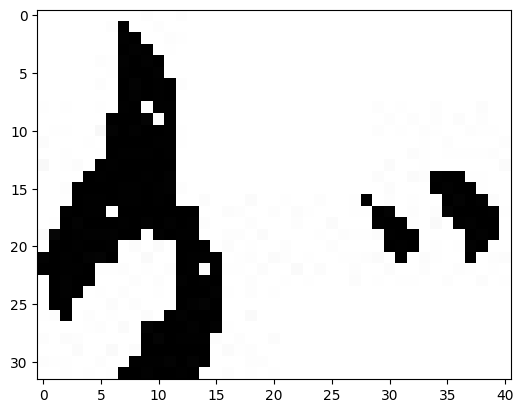

い


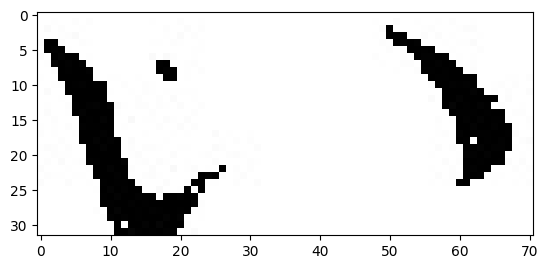

け


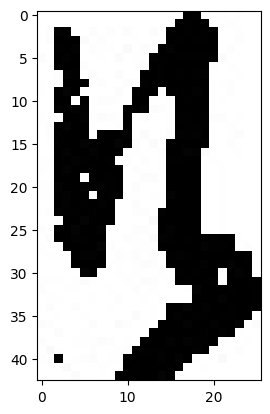

に


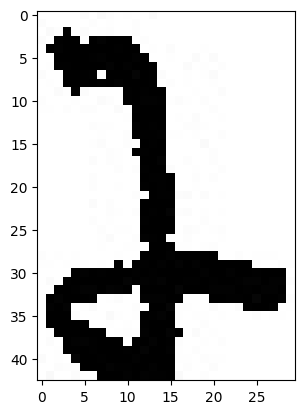

に


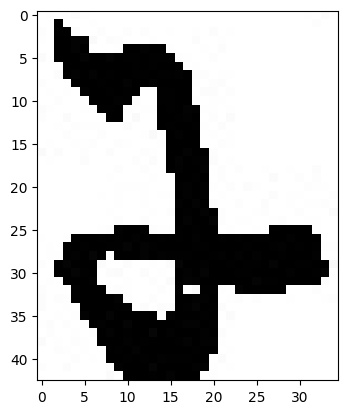

の


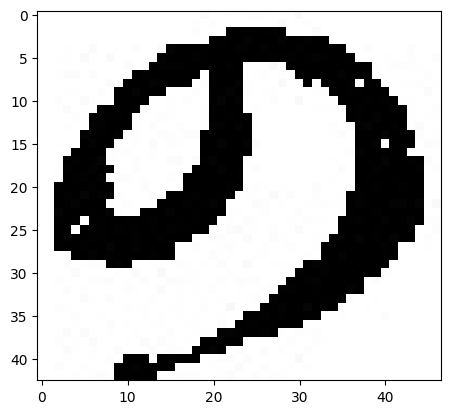

工


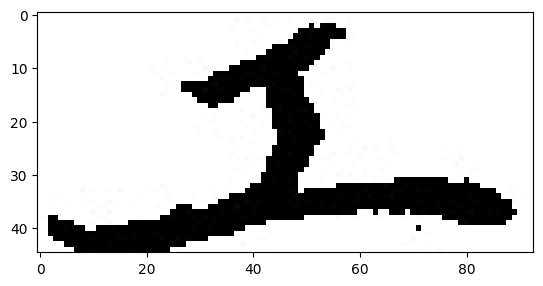

こ


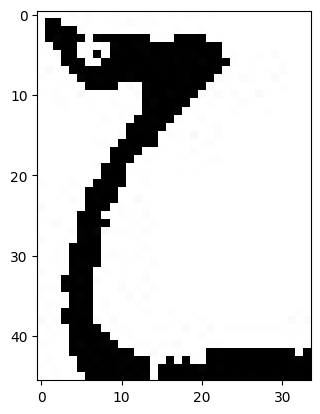

三


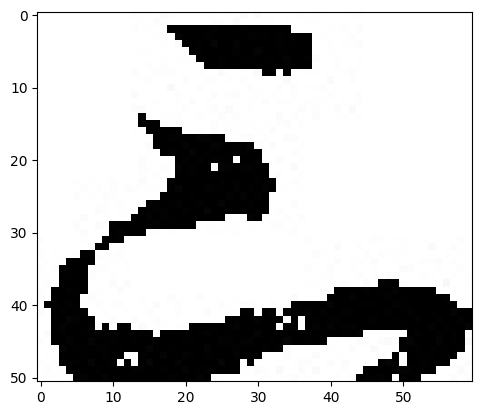

の


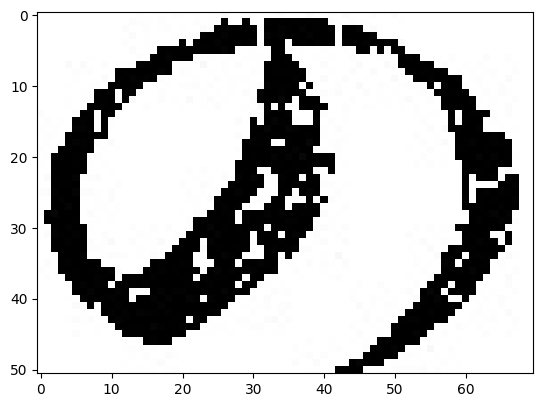

や


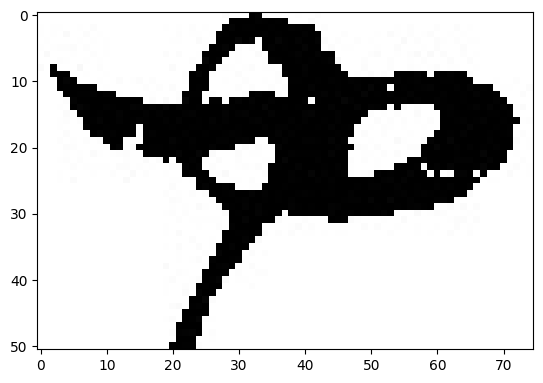

と


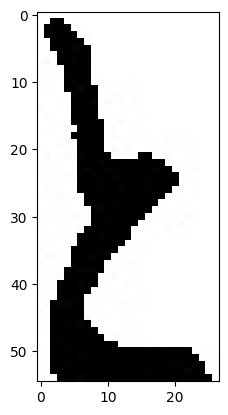

己


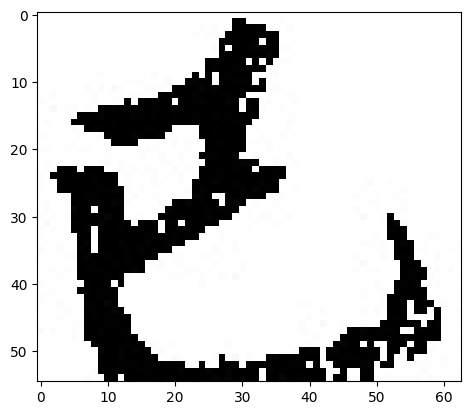

も


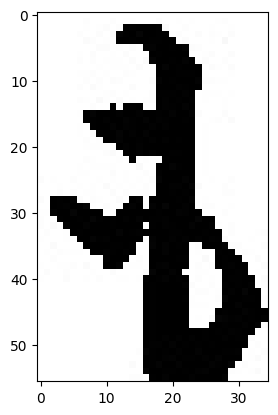

さ


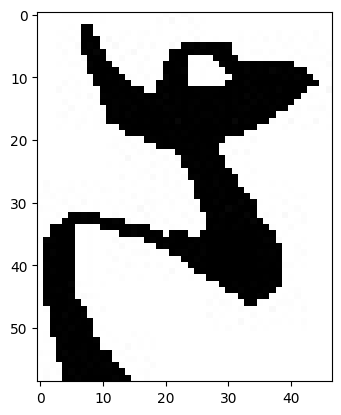

の


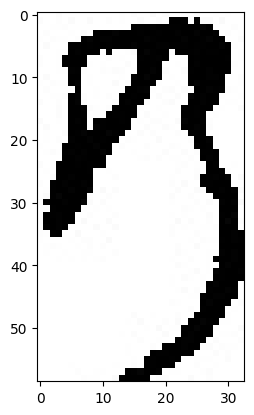

の


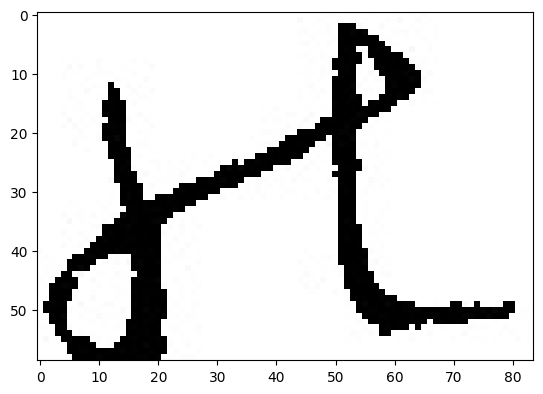

世


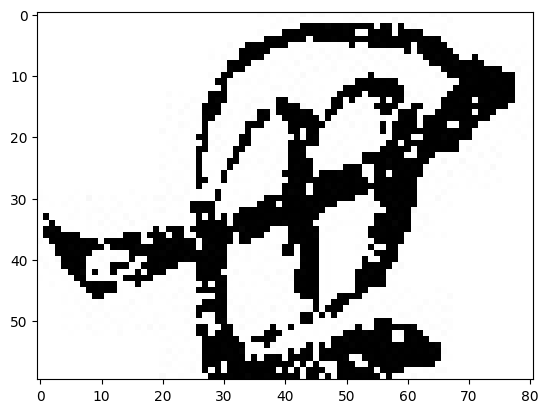

細


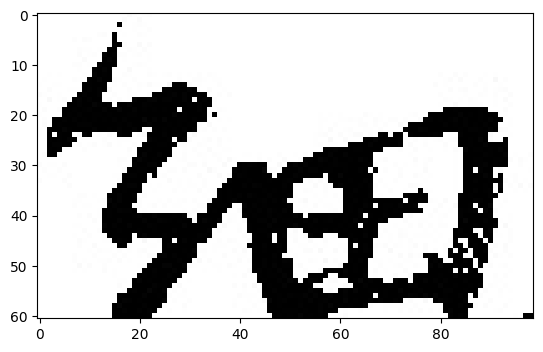

そ


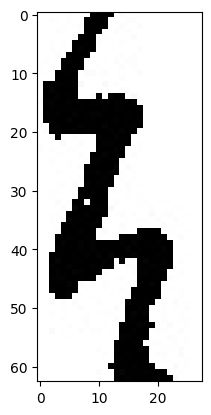

人


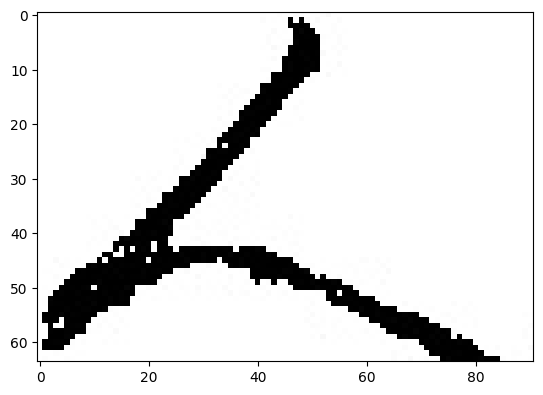

け


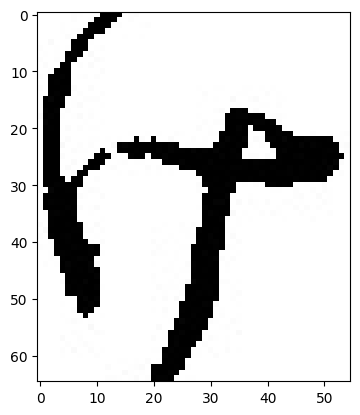

れ


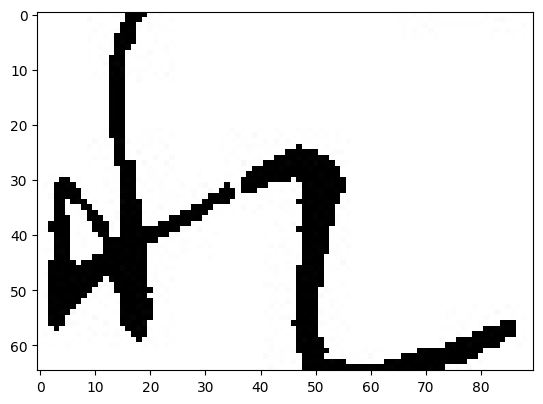

だ


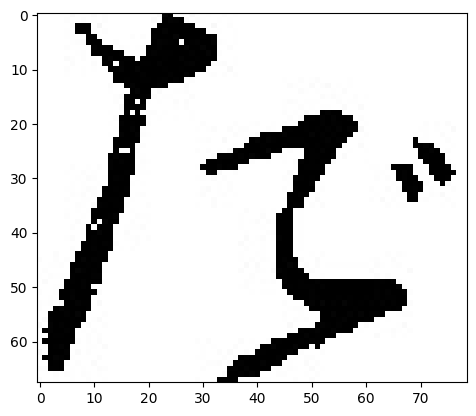

強


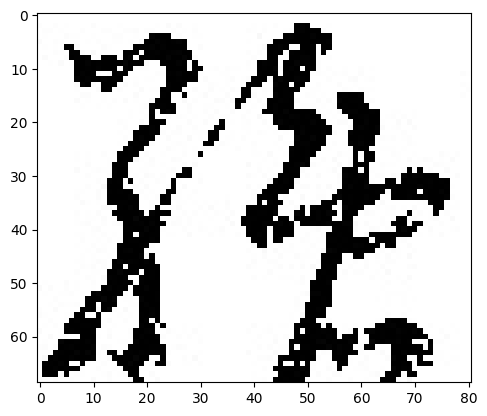

の


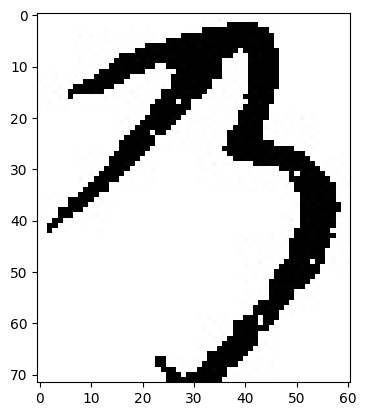

た


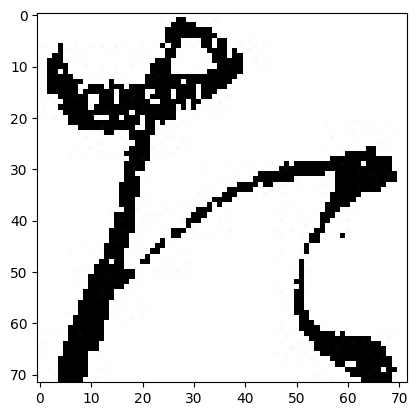

て


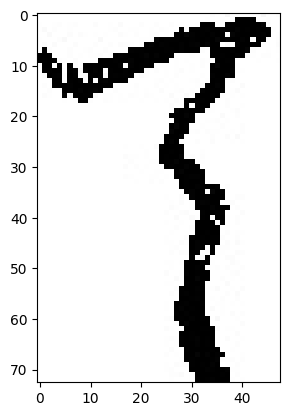

俳


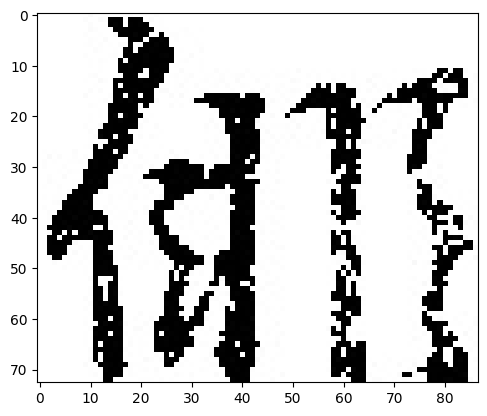

根


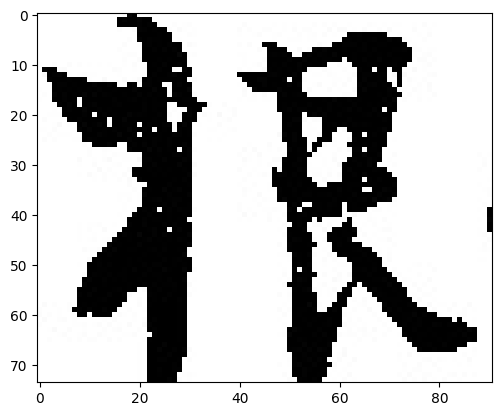

か


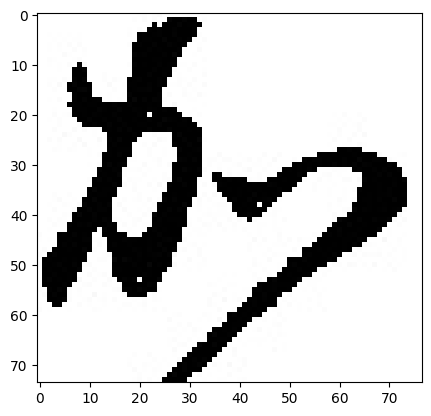

諧


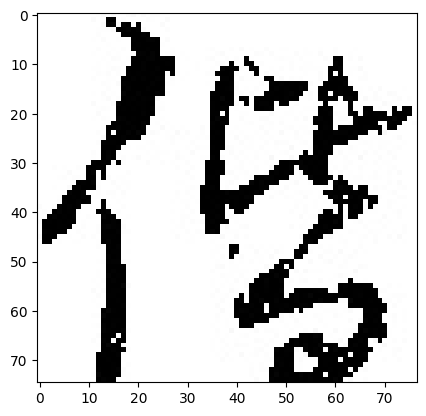

れ


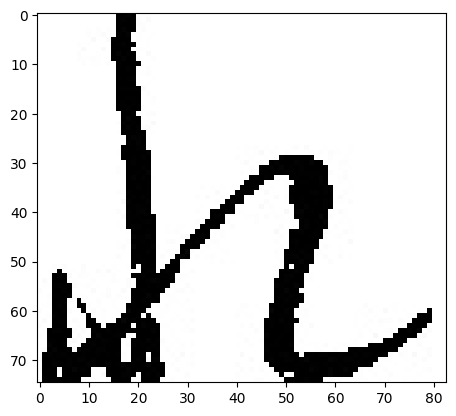

子


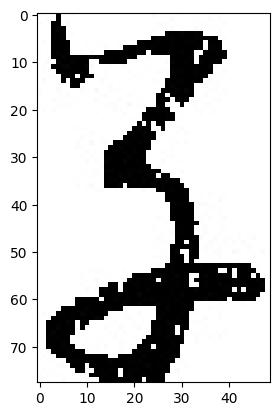

を


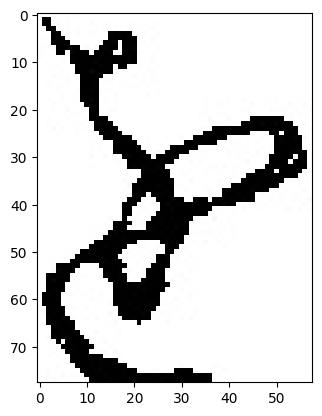

及


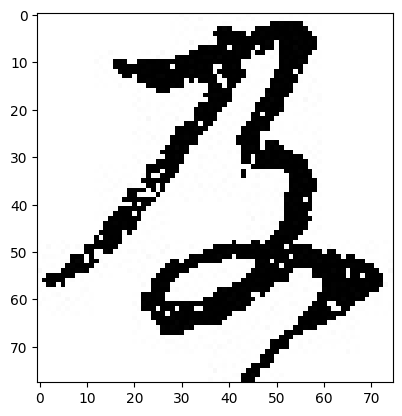

者


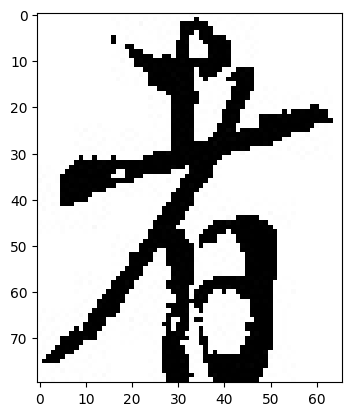

ず


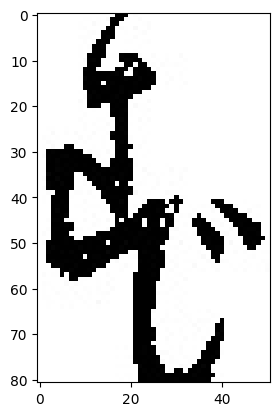

避


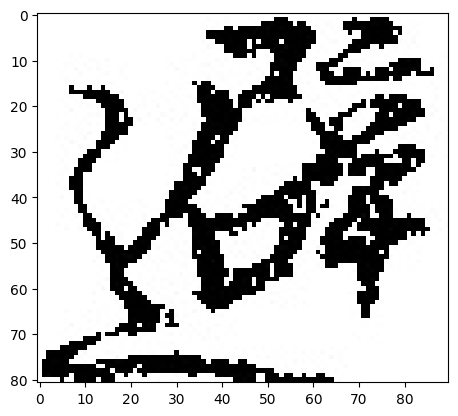

正


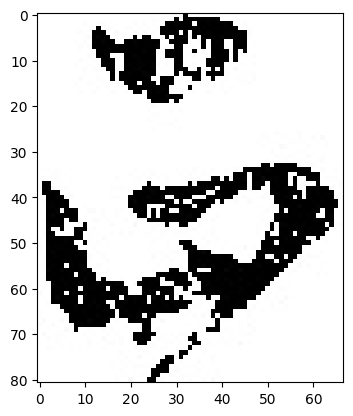

文


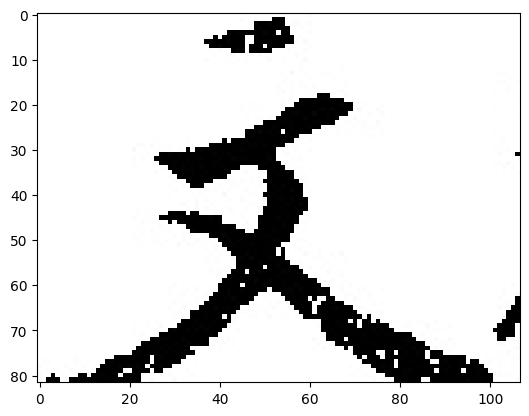

ふ


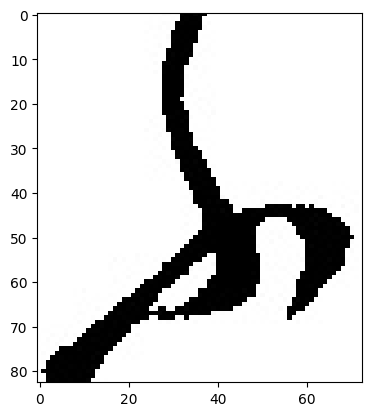

時


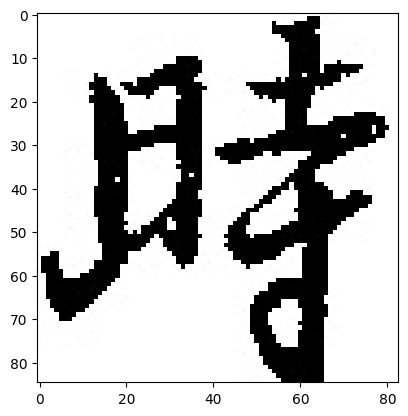

思


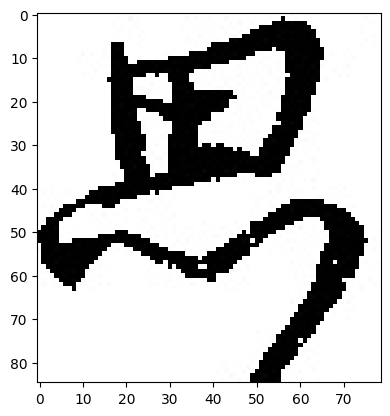

な


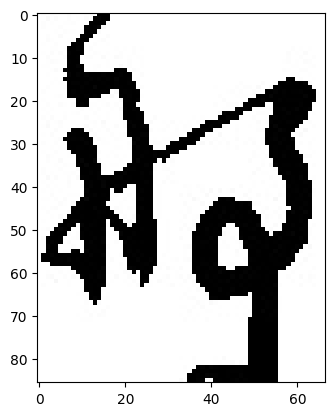

め


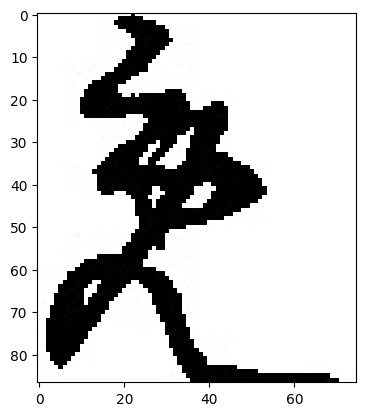

浮


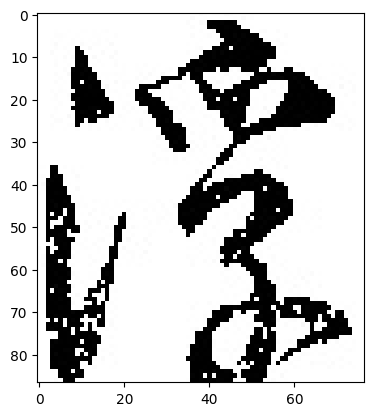

を


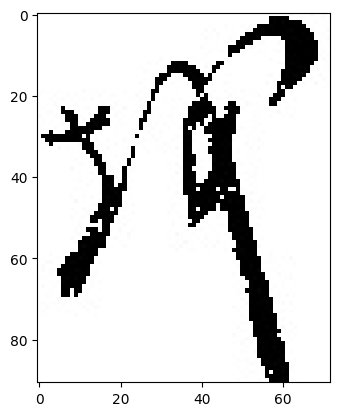

気


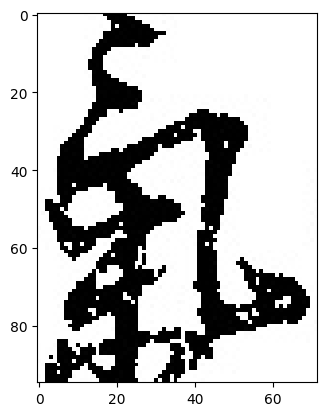

職


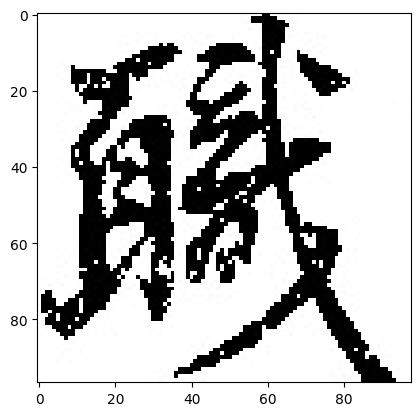

老


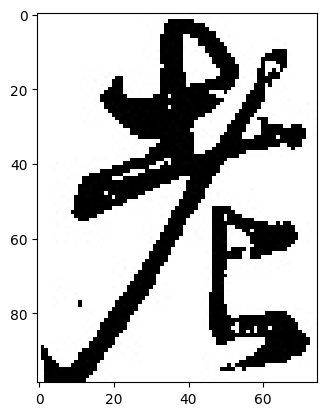

武


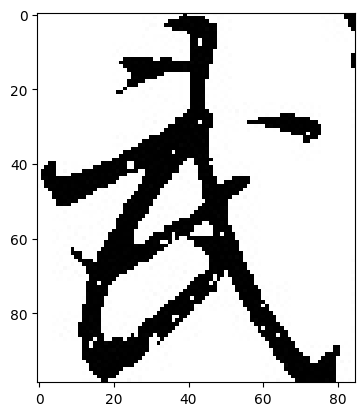

楽


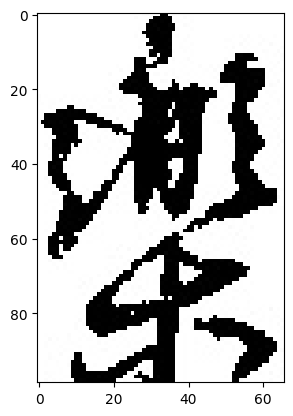

も


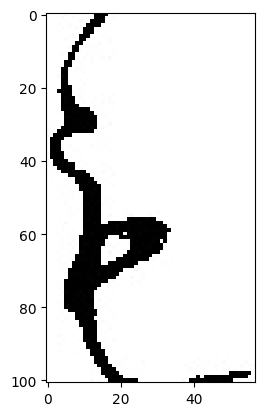

盲


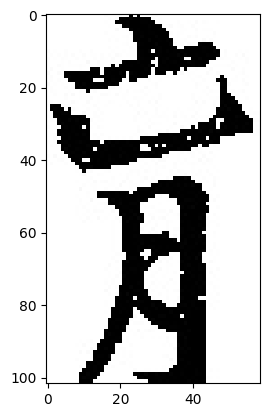

若


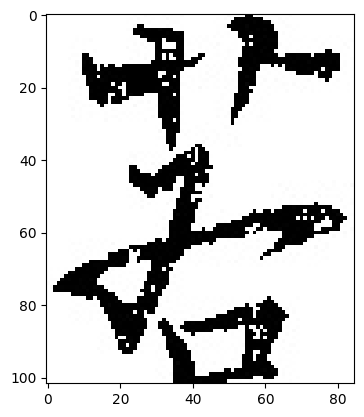

自


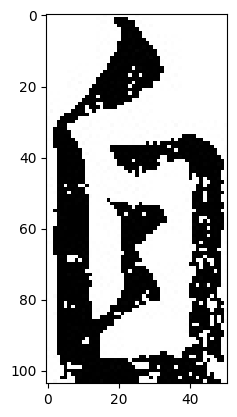

ど


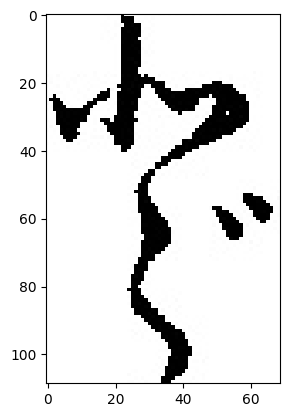

風


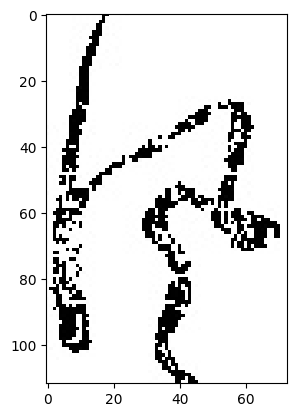

に


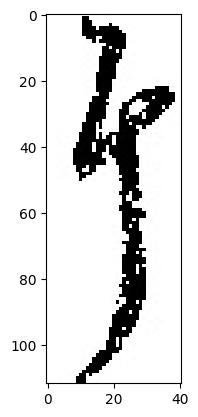

裏


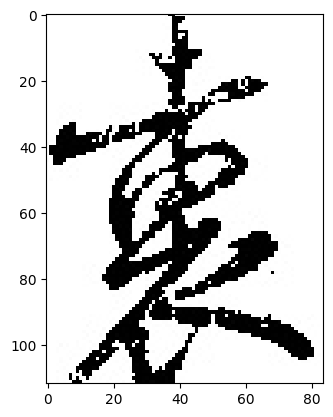

畳


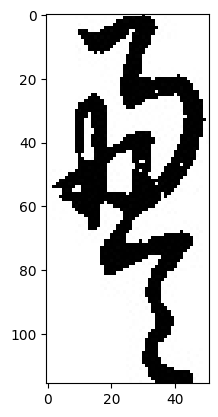

息


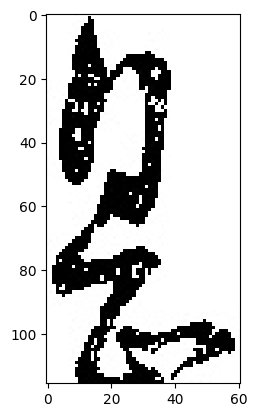

序


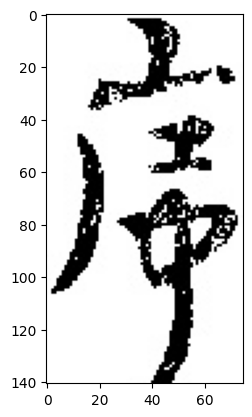

し


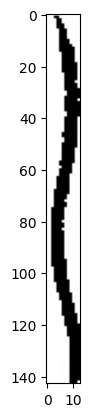

し


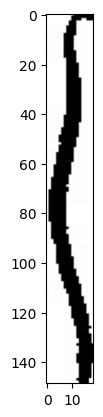

In [15]:
img_id, img, labels = df.values[0]
viz = visualize_training_data('kuzushiji_resized/train_images/{}.jpg'.format(img_id), labels)

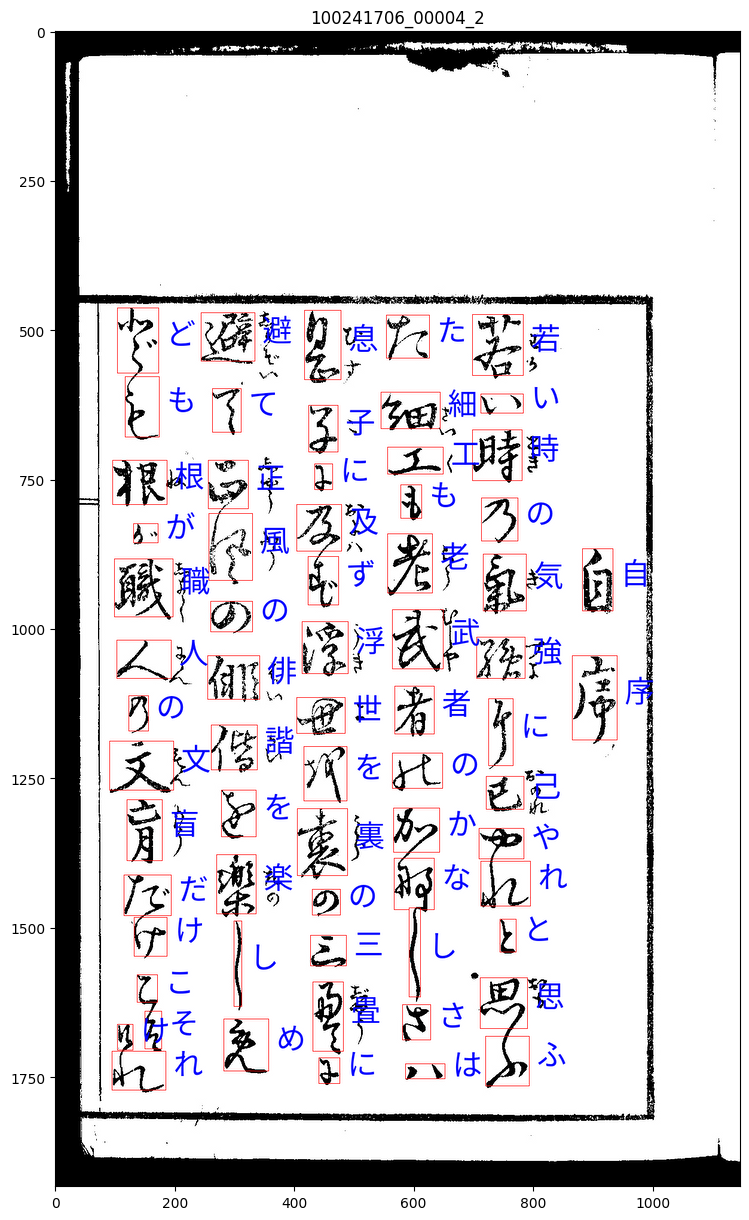

In [16]:
plt.figure(figsize=(15, 15))
plt.title(img_id)
plt.imshow(viz, interpolation='lanczos')
plt.show()

In [17]:
import csv

# open the file in the write mode
f = open('kuzushiji_resized/train1.csv', 'w', newline='', encoding='utf-8')

# create the csv writer
writer = csv.writer(f)

header = ['image_id', 'features', 'labels']

# write a row to the csv file
writer.writerow(header)

26

In [18]:
rows = []
for index, row in df.iterrows():
    image_id = row[0]
    features = row[1]
    labels = row[2]
#     labelsstr = ""
#     for label in labels:
#         for l in label:
#             labelsstr += str(l)
#             labelsstr += " "
#     csvrow = [image_id, labelsstr]
    csvrow = [image_id, features, labels]
#     rows.append(csvrow)
    writer.writerow(csvrow)

In [ ]:
# writer.writerows(rows)

In [19]:
f.close()
